#### Arunjith PM - DSML september Batch

# Business Case: Delhivery - Feature Engineering

## About Delhivery



Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

## Business Problem

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


*Data set*
- data - whether the data is testing or training data
- trip_creation_time – timestamp of trip creation
- route_schedule_uuid – unique Id for a particular route schedule
- route_type – Transportation type<br>
  FTL – Full Truck Load: FTL shipments get to the destination sooner, as the
truck is making no other pickups or drop-offs along the way.<br>Carting: handling system consisting of small vehicles (carts)
- trip_uuid - unique ID given to a particular trip (A trip may include different source
and destination centers)
- source_center - source ID of trip origin
- source_name - source Name of trip origin
- destination_cente – destination ID
- destination_name – destination Name
- od_start_time – trip start time
- od_end_time – trip end time
- start_scan_to_end_scan – time taken to deliver from source to destination
- actual_distance_to_destination – distance in Kms between source and
destination warehouse
- actual_time – actual time taken to complete the delivery (cumulative)
- osrm_time – an open-source routing engine time calculator which computes the
shortest path between points in a given map<br>(includes usual traffic, distance
through major and minor roads) and gives the time (cumulative)
- osrm_distance – an open-source routing engine which computes the shortest
path between points in a given map<br>(includes usual traffic, distance through
major and minor roads) (cumulative)
- segment_actual_time – this is a segment time. Time taken by the subset of the
package delivery
- segment_osrm_time – this is the OSRM segment time. Time taken by the subset
of the package delivery
- segment_osrm_distance – this is the OSRM distance. Distance covered by subset
of the package delivery

## Problem statement

- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using describe function and boxplot
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- Which rutetype use more time to deliver
- Rute type preffered for the product delevery
- which destination state has most delivery 
- which source state has most delivery 
- No_of delevery  across month
- Weekday & Month with most delivery of the products
- Which dest_city has most product deliverys in a state
- Source_city with most deliverys in a state
- Which state has more source center
- Which state has more destination center
- Top Indian states with most source and destination cities
- Relation between actual time and estimated time for the completion of product delivery
- Relation between actual distance and estimated distance for product delivery
- Relation between actual time and estimated time for product deliver from source to destination
- Relation between actual time and estimated time for diffrent route types
- Relation between actual distance and estimated distance for diffrent route types

- Feature engineering
  - Calculate the time taken between od_start_time and od_end_time as time_difference
- Hypothesis
  - Compare the difference between time_difference and start_scan_to_end_scan.
  - Actual_time aggregated value and OSRM time aggregated value
  - Actual_time aggregated value and segment actual time aggregated value
  - Osrm distance aggregated value and segment osrm distance aggregated value
  - Osrm time aggregated value and segment osrm time aggregated value
- Find outliers in the numerical variables and check it using visual analysis
- One-hot encoding of categorical variables
- Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Dataset

In [140]:
data=pd.read_csv('delhivery_data (1).csv')
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [3]:
#length of data
len(data)

144867

- Data contains 144867 rows and 24 columns

In [4]:
data.data.unique()

array(['training', 'test'], dtype=object)

- Data contains training, test elements

In [5]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

- These are the column names in our dataset

### checking datatypes

In [6]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

- Data contains object => typically categorical/IDs ,Int64, Float64 datatypes

## Basic Data Exploration

In [7]:
data.describe()
# only numeric features

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


- Mean and median of almost all columns are diffrent . There is lots of outlayers in this dataset

In [8]:
# catgeorical features
data.describe(include = ['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


- There is almost 1500 destination_center and source_center in Delhivery

## Checking for duplicate values

In [134]:
data.duplicated().sum()


0

- There are no duplicate values in the dataset


## Missing values

In [141]:
def missing_to_df(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [142]:
missing_to_df(data)

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


- Data contains missing values in destination_name and  source_name features
- Both destination_name and  source_name features are less than 1 percent of null values

## Separating data in to Categorical Data And Numerical Data

In [10]:
cat_cols=data.dtypes =='object'
cat_cols

data                               True
trip_creation_time                 True
route_schedule_uuid                True
route_type                         True
trip_uuid                          True
source_center                      True
source_name                        True
destination_center                 True
destination_name                   True
od_start_time                      True
od_end_time                        True
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                   True
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [11]:
cat_cols[cat_cols]

data                   True
trip_creation_time     True
route_schedule_uuid    True
route_type             True
trip_uuid              True
source_center          True
source_name            True
destination_center     True
destination_name       True
od_start_time          True
od_end_time            True
cutoff_timestamp       True
dtype: bool

In [144]:
#catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

In [143]:
cat_cols

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp']

These are catgeorical columns in our data
 > Here od_start_time, od_end_time, trip_creation_time, cutoff_timestamp are date-time format   
 
Nominal featues are -                                                              
 > data                                   
 > route_schedule_uuid                                                       
 > source_center                      
 > source_name                                  
 > destination_center                                      
 > destination_name                                                        
 > source_center
 
Ordinal featues -                   
 > route_type   

In [146]:
num_cols

['start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

- These are numarical columns in our data

### No. Of Unique Values in each category of columns

In [13]:
for i in data[num_cols].columns:
    print(i,':',data[i].nunique())

start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


- these are no.of unique values in our numerical data

In [14]:
for i in data[cat_cols].columns:
    print(i,':',data[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
cutoff_timestamp : 93180


- these are no.of unique values in our categorical data

## Unique values in each category of columns

In [15]:
#Unique values in our numerical data
for i in data[num_cols].columns:
  print(i,':',data[i].unique())

start_scan_to_end_scan : [  86.  109.  302. ... 2476. 1161. 2949.]
is_cutoff : [ True False]
cutoff_factor : [   9   18   27   36   39   43   22   44   66   88  100   16  110  132
  154  176  198  220  242  264  286  308  330  331   20   38   31   28
   33   37   45   54   56   52  128   17   62   79   29  125  147   61
   34  208   21  352  374  396  418  440  442   63   64  265   55  203
  289  277   46   67   83   49  123  101   24   60   19   10  252   53
   98   75   59   51  462  484  506  528  550  572  594  616  638  660
  682  704  726  748  770  792  814  836  858  880  902  924  946  962
   69   50   93   35   25   14  267  731   99  366  401  511   23   15
   13  968  990 1012 1034 1056 1078 1100 1122 1144 1166 1188 1210 1232
 1254 1276 1298 1320 1342 1364 1386 1408 1430 1452 1474 1496 1518 1540
 1562 1584 1606 1628 1650 1672 1689   41   26   48   30   12   11   32
   72   81  735   42   47   82   87  236  514   78   65  142   58  247
  281  210   40  151  141  103 1236  15

- These are unique values in our numerical data

In [16]:
#number of unique values in our categorical data
for i in data[cat_cols].columns:
  print(i,':',data[i].unique())

data : ['training' 'test']
trip_creation_time : ['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
route_schedule_uuid : ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
route_type : ['Carting' 'FTL']
trip_uuid : ['trip-153741093647649320' 'trip-153768492602129387'
 'trip-153693976643699843' ... 'trip-153761584139918815'
 'trip-153718412883843340' 'trip-153746066843555182']
source_center : ['IND388121AAA' 'IND388620AAB' 'IND421302AAG' ... 'IND361335AAA'
 'IND562132AAC' 'IND639104AAB']
source_name : ['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankol

- These are unique values in our categorical data

## Convert object type To DateTime


- Features like trip_creation_time,od_start_time,od_end_time,cutoff_timestamp are in object format.
- Coverting them to datetime format

In [17]:

data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])
data['cutoff_timestamp']=data['cutoff_timestamp'].astype('datetime64')

In [18]:
data.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

### value counts

In [19]:
for i in data.columns:
  print(i,':',data[i].value_counts())

data : training    104858
test         40009
Name: data, dtype: int64
trip_creation_time : 2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: trip_creation_time, Length: 14817, dtype: int64
route_schedule_uuid : thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-

- Above are the value counts of each 24 columns in our data

## Missing Values & Data Cleaning

In [20]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

- In this whole data only source_name and destination_name have missing values. Destination_name have 261 missing value and Source_name have 293 missing value


In [21]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [22]:
total_missing_df = data.isnull().sum().sort_values(ascending =False)
total_missing_df


source_name                       293
destination_name                  261
data                                0
cutoff_factor                       0
segment_osrm_distance               0
segment_osrm_time                   0
segment_actual_time                 0
factor                              0
osrm_distance                       0
osrm_time                           0
actual_time                         0
actual_distance_to_destination      0
cutoff_timestamp                    0
is_cutoff                           0
trip_creation_time                  0
start_scan_to_end_scan              0
od_end_time                         0
od_start_time                       0
destination_center                  0
source_center                       0
trip_uuid                           0
route_type                          0
route_schedule_uuid                 0
segment_factor                      0
dtype: int64

In [23]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


- From source_name 0.20% data values are missing
- From destination_name 0.18 % data values are missing

### Mode imputation for categorical features

In [24]:
from sklearn.impute import SimpleImputer
# Highest Freq imputation for some categorical columns.
cat_missing = ['source_name', 'destination_name']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [25]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent


In [26]:
missing_to_df(data)

,Total,Percent
data,0,0.0
trip_creation_time,0,0.0
segment_osrm_distance,0,0.0
segment_osrm_time,0,0.0
segment_actual_time,0,0.0
factor,0,0.0
osrm_distance,0,0.0
osrm_time,0,0.0
actual_time,0,0.0
actual_distance_to_destination,0,0.0


# Merging the rows


- Our data contains same trips splits as different rows based on diffrent SourceID and DestinationID. So, we need to merge and make unique trip_id in data

## Row merge based on columns 1. Trip_uuid, Source ID and Destination ID 

In [27]:
merge_data=data.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first','trip_creation_time':'first',
'route_schedule_uuid':'first','route_type':'first','source_name':'first','destination_name':'last','od_start_time':'first',
'od_end_time':'first','start_scan_to_end_scan':'max','actual_distance_to_destination':'max','actual_time':'max',
'osrm_time':'max','osrm_distance':'max','segment_actual_time':'sum','segment_osrm_time':'sum',
                                'segment_osrm_distance':'sum'}).reset_index()
merge_data

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


- Corresponding aggregated columns are start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance

## Further row merging based on columns 1. Trip_uuid 

In [28]:

merge_trip_data=merge_data.groupby('trip_uuid').agg({'data':'first','trip_creation_time':'first',
'route_schedule_uuid':'first','route_type':'first','source_center':'first','source_name':'first','destination_center':'last','destination_name':'last','od_start_time':'first',
'od_end_time':'first','start_scan_to_end_scan':'sum','actual_distance_to_destination':'sum','actual_time':'sum',
'osrm_time':'sum','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum',
                                'segment_osrm_distance':'sum'}).reset_index()
merge_trip_data

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 02:28:43.529141,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


- Sum of each aggregated columns are further obtained for respective columns are start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance

##  Build some features to prepare the data for actual analysis 


### Destination Name: Split and extract features out of destination. City-place-code (State)

In [29]:
dr=merge_trip_data.copy()

In [30]:
x=dr["destination_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y

                            0              1
0         Kanpur_Central_H_6   Uttar Pradesh
1      Doddablpur_ChikaDPP_D       Karnataka
2        Gurgaon_Bilaspur_HB         Haryana
3           Mumbai_MiraRd_IP     Maharashtra
4          Sandur_WrdN1DPP_D       Karnataka
...                       ...            ...
14812  Chandigarh_Mehmdpur_H          Punjab
14813   Faridabad_Blbgarh_DC         Haryana
14814     Kanpur_GovndNgr_DC   Uttar Pradesh
14815  Tirchchndr_Shnmgprm_D      Tamil Nadu
14816      Sandur_WrdN1DPP_D       Karnataka

[14817 rows x 2 columns]


,0,1,2,3
0,Kanpur,Central,H,6
1,Doddablpur,ChikaDPP,D,None
2,Gurgaon,Bilaspur,HB,None
3,Mumbai,MiraRd,IP,None
4,Sandur,WrdN1DPP,D,None
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H,None
14813,Faridabad,Blbgarh,DC,None
14814,Kanpur,GovndNgr,DC,None
14815,Tirchchndr,Shnmgprm,D,None


In [31]:
merge_trip_data['dest_city']  = y[0]
merge_trip_data['dest_place'] = y[1]
merge_trip_data['dest_state'] = x[1]

- Features like city, place and state are extracted from the 'destination_name' by splitting the column into 3 component columns 

## Source Name: Split and extract features out of destination. City-place-code (State)

In [32]:
x=dr["source_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y

                             0              1
0          Kanpur_Central_H_6   Uttar Pradesh
1       Doddablpur_ChikaDPP_D       Karnataka
2         Gurgaon_Bilaspur_HB         Haryana
3                  Mumbai Hub     Maharashtra
4                  Bellary_Dc       Karnataka
...                        ...            ...
14812   Chandigarh_Mehmdpur_H          Punjab
14813      FBD_Balabhgarh_DPC         Haryana
14814      Kanpur_GovndNgr_DC   Uttar Pradesh
14815  Tirunelveli_VdkkuSrt_I      Tamil Nadu
14816       Sandur_WrdN1DPP_D       Karnataka

[14817 rows x 2 columns]


,0,1,2,3
0,Kanpur,Central,H,6
1,Doddablpur,ChikaDPP,D,None
2,Gurgaon,Bilaspur,HB,None
3,Mumbai Hub,None,None,None
4,Bellary,Dc,None,None
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H,None
14813,FBD,Balabhgarh,DPC,None
14814,Kanpur,GovndNgr,DC,None
14815,Tirunelveli,VdkkuSrt,I,None


In [33]:
merge_trip_data['source_city']  = y[0]
merge_trip_data['source_place'] = y[1]
merge_trip_data['source_state'] = x[1]

In [34]:
merge_trip_data

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,dest_city,dest_place,dest_state,source_city,source_place,source_state
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,991.3523,1548.0,1008.0,1320.4733,Kanpur,Central,Uttar Pradesh,Kanpur,Central,Uttar Pradesh
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,85.1110,141.0,65.0,84.1894,Doddablpur,ChikaDPP,Karnataka,Doddablpur,ChikaDPP,Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,2372.0852,3308.0,1941.0,2545.2678,Gurgaon,Bilaspur,Haryana,Gurgaon,Bilaspur,Haryana
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,19.6800,59.0,16.0,19.8766,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,146.7918,340.0,115.0,146.7919,Sandur,WrdN1DPP,Karnataka,Bellary,Dc,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,73.4630,82.0,62.0,64.8551,Chandigarh,Mehmdpur,Punjab,Chandigarh,Mehmdpur,Punjab
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,16.0882,21.0,11.0,16.0883,Faridabad,Blbgarh,Haryana,FBD,Balabhgarh,Haryana
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,63.2841,281.0,88.0,104.8866,Kanpur,GovndNgr,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,177.6635,258.0,221.0,223.5324,Tirchchndr,Shnmgprm,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu


- Features like city, place and state are extracted from the 'source_name' by splitting the column into 3 component columns 


## Trip_creation_time: Extract features like month, year and day etc

In [35]:
merge_trip_data['tot_mins_diff'] = (merge_trip_data.od_end_time - merge_trip_data.od_start_time) / pd.Timedelta(minutes=1)
merge_trip_data['trip_creation_year'] = merge_trip_data['trip_creation_time'].dt.year
merge_trip_data['trip_creation_month'] = merge_trip_data['trip_creation_time'].dt.month
merge_trip_data['trip_creation_day'] = merge_trip_data['trip_creation_time'].dt.day
merge_trip_data.drop(columns=['source_name','destination_name','od_start_time','od_end_time','od_start_time'],axis=1,inplace=True)
merge_trip_data

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_city,dest_place,dest_state,source_city,source_place,source_state,tot_mins_diff,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND209304AAA,2259.0,824.732854,1562.0,...,Kanpur,Central,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,1260.604421,2018,9,12
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,180.0,73.186911,143.0,...,Doddablpur,ChikaDPP,Karnataka,Doddablpur,ChikaDPP,Karnataka,58.832388,2018,9,12
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND000000ACB,3933.0,1932.273969,3347.0,...,Gurgaon,Bilaspur,Haryana,Gurgaon,Bilaspur,Haryana,834.638929,2018,9,12
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,100.0,17.175274,59.0,...,Mumbai,MiraRd,Maharashtra,Mumbai Hub,None,Maharashtra,100.494935,2018,9,12
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,717.0,127.448500,341.0,...,Sandur,WrdN1DPP,Karnataka,Bellary,Dc,Karnataka,152.012914,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,IND160002AAC,257.0,57.762332,83.0,...,Chandigarh,Mehmdpur,Punjab,Chandigarh,Mehmdpur,Punjab,152.787843,2018,10,3
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,IND121004AAA,60.0,15.513784,21.0,...,Faridabad,Blbgarh,Haryana,FBD,Balabhgarh,Haryana,60.590521,2018,10,3
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,IND208006AAA,421.0,38.684839,282.0,...,Kanpur,GovndNgr,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh,248.409092,2018,10,3
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,IND628204AAA,347.0,134.723836,264.0,...,Tirchchndr,Shnmgprm,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,105.656951,2018,10,3


- Features like year, month and day are extracted from the 'source_name' by splitting the column into 3 component columns 
- Dropped unwanted columns from the dataframe ('source_name','destination_name','od_start_time','od_end_time','od_start_time')

## Distribution of Quatitative data

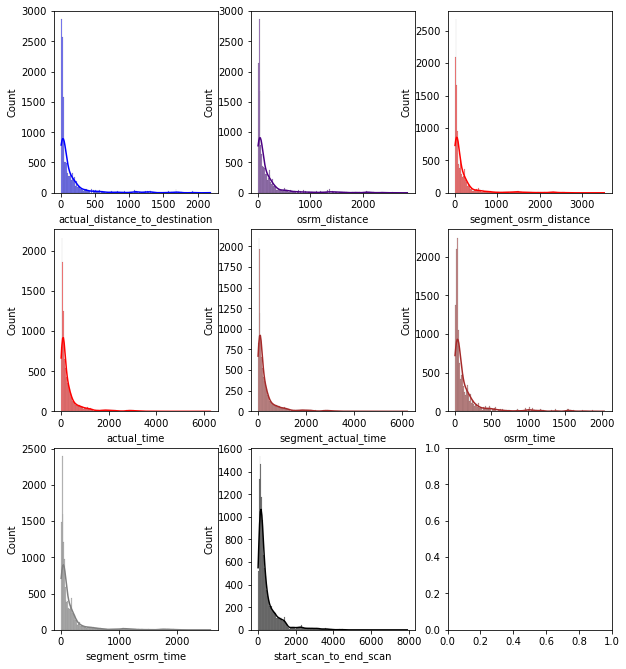

In [36]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=merge_trip_data, x="actual_distance_to_destination", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=merge_trip_data, x="osrm_distance", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=merge_trip_data, x="segment_osrm_distance", kde=True,color="red", ax=axis[0,2])
sns.histplot(data=merge_trip_data, x="actual_time", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=merge_trip_data, x="segment_actual_time", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=merge_trip_data, x="osrm_time", kde=True,color="brown", ax=axis[1,2])
sns.histplot(data=merge_trip_data, x="segment_osrm_time", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=merge_trip_data, x="start_scan_to_end_scan", kde=True,color="black", ax=axis[2,1])
#sns.histplot(data=merge_trip_data, x="total_min_diff", kde=True,color="black", ax=axis[2,2])
plt.show()

From the above observations we can say that :- 
- Most of the values in actual_distance_to_destination lies in range of 0 - 500.
- Most of the values in osrm_distance lies in range of 0 - 700.
- Most of the values in segment_osrm_distance_sum lies in                 range of 0 - 600.
- Most of the values in actual_time lies in range of 0 - 1000.
- Most of the values in segment_actual_time_sum lies in                       range of 0 - 1100.
- Most of the values in osrm_time lies in range of 0 - 400.
- Most of the values in segment_osrm_time_sum lies in range of 0 - 500.
- Most of the values in start_scan_to_end_scan lies in range of 0 - 1900.
- Most of the values in od_time_diff_hour lies in range of 0 - 1900.

## Correlation of quatitative variable

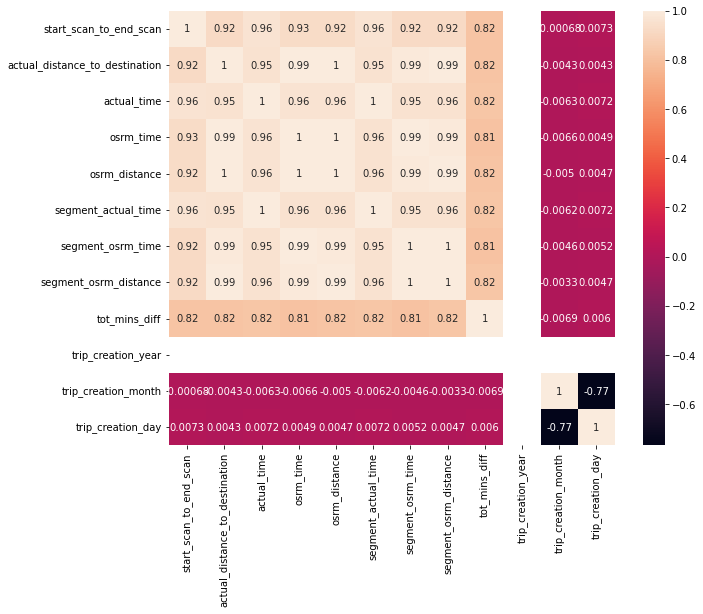

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(merge_trip_data.corr(), annot=True)
plt.show()

-> From the above observation we can say that :-                                                             
- The correlation between trip_creation_day and trip_creation_month with other attributes are comparitively low.       
- All other attributes are highly correlated.


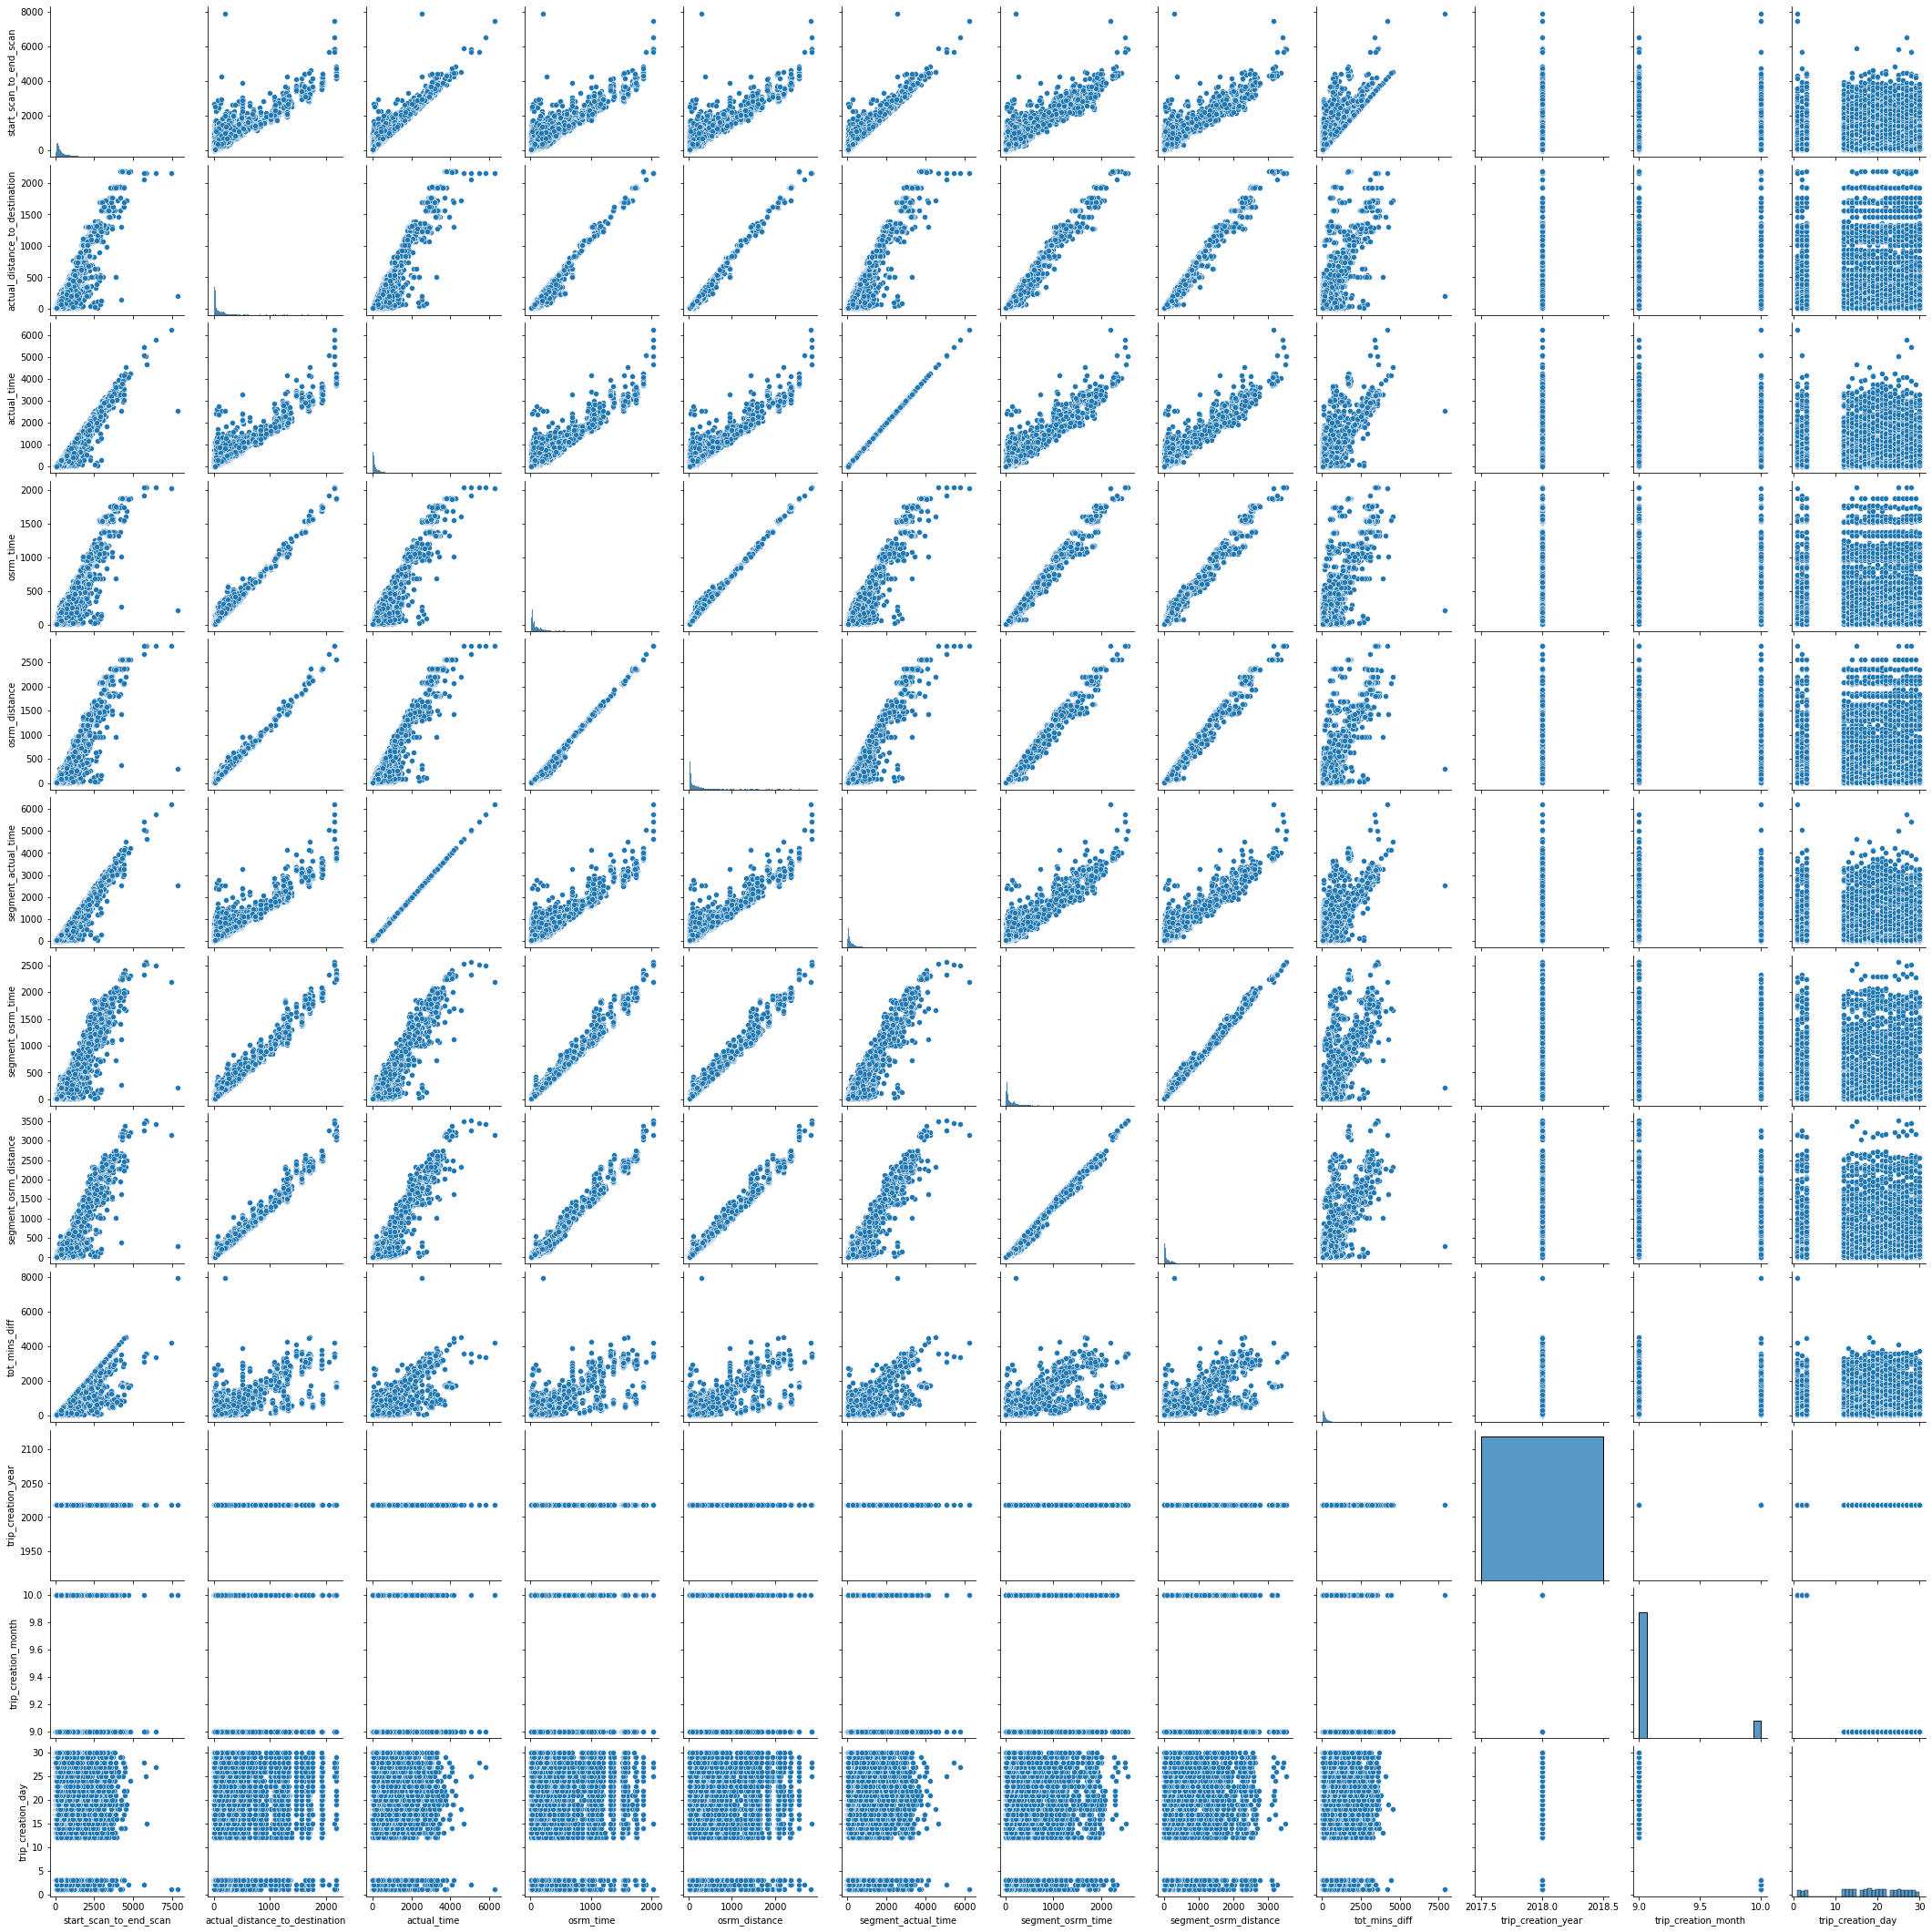

In [38]:
sns.pairplot(data=merge_trip_data)

## Data Visualization

## Univariate Analysis

## Which rutetype use more time to deliver

In [39]:
x1=merge_trip_data.groupby('route_type')['start_scan_to_end_scan'].mean().to_frame('mean').reset_index()
x1

,route_type,mean
0,Carting,246.537382
1,FTL,959.359790


[]

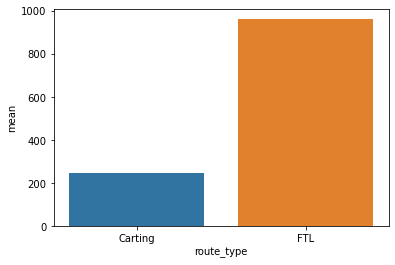

In [40]:
sns.barplot(x='route_type',y='mean',data=x1)
plt.plot()

- Carting is the fastest way to delever products
- FTL takes almost 3 times start_scan_to_end_scan time that Carting type

### Rute type preffered for the product delevery

In [41]:
x=merge_trip_data.groupby('route_type')['trip_uuid'].count().reset_index()
x

,route_type,trip_uuid
0,Carting,8908
1,FTL,5909


[]

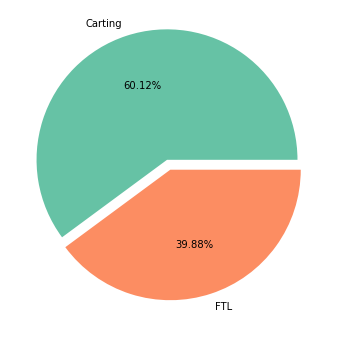

In [42]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x, x=x['trip_uuid'], colors=palette_color, labels=['Carting', 'FTL'], explode=(0.08,0), autopct='%0.2f%%')
plt.plot()

- Carting is the most preffered product delevery choice by users becouse it takes less time to deliver
- Almost 60% users are preffering Carting type

## Bivariate Analysis

## which destination state has most delivery 

In [43]:
x1=merge_trip_data.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(5).reset_index()
dt_5=list(x1['dest_state'])
x1

,dest_state,trip_uuid
0,Maharashtra,2561
1,Karnataka,2294
2,Haryana,1670
3,Tamil Nadu,1084
4,Uttar Pradesh,811


<AxesSubplot:xlabel='trip_uuid', ylabel='dest_state'>

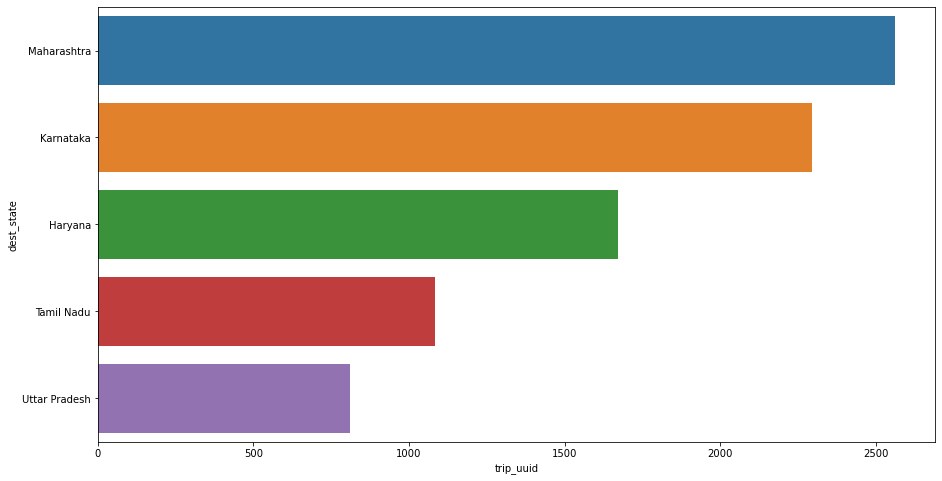

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(y='dest_state',x='trip_uuid',data=x1)

- More delivery done in Maharashtra state :2561
- After that karnataka : 2294

## which source state has most delivery 

In [45]:
x1=merge_trip_data.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(5).reset_index()
st_5=list(x1['source_state'])
x1

,source_state,trip_uuid
0,Maharashtra,2714
1,Karnataka,2143
2,Haryana,1854
3,Tamil Nadu,1039
4,Telangana,781


<AxesSubplot:xlabel='trip_uuid', ylabel='source_state'>

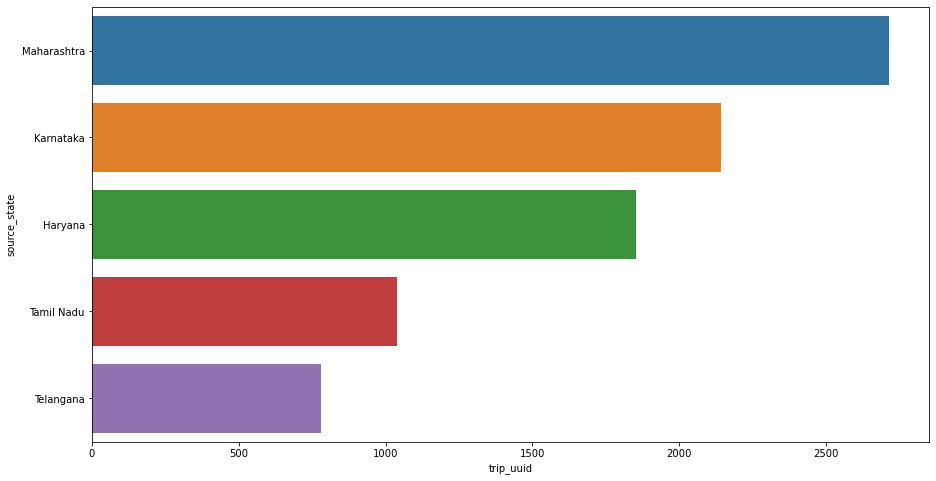

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(y='source_state',x='trip_uuid',data=x1)

- The sourcestate Maharashtra have delivery around 2714
- After that karnataka : 2143


##  No_of delevery  across month

<AxesSubplot:xlabel='trip_creation_day', ylabel='count'>

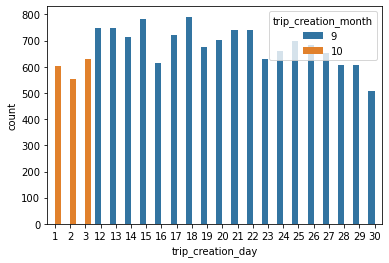

In [47]:
sns.countplot(data=merge_trip_data,x='trip_creation_day',hue='trip_creation_month')

- there is uniform distribution of delivery across each days in a month

- 18th and 15th day of the month are having highest number of deliverys 

## Weekday & Month with most delivery of the products


In [48]:
merge_trip_data['weekday'] = merge_trip_data['trip_creation_time'].dt.day_name()
merge_trip_data['month'] = merge_trip_data['trip_creation_time'].dt.month_name()
merge_trip_data


,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_state,source_city,source_place,source_state,tot_mins_diff,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND209304AAA,2259.0,824.732854,1562.0,...,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,1260.604421,2018,9,12,Wednesday,September
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,180.0,73.186911,143.0,...,Karnataka,Doddablpur,ChikaDPP,Karnataka,58.832388,2018,9,12,Wednesday,September
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND000000ACB,3933.0,1932.273969,3347.0,...,Haryana,Gurgaon,Bilaspur,Haryana,834.638929,2018,9,12,Wednesday,September
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,100.0,17.175274,59.0,...,Maharashtra,Mumbai Hub,None,Maharashtra,100.494935,2018,9,12,Wednesday,September
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,717.0,127.448500,341.0,...,Karnataka,Bellary,Dc,Karnataka,152.012914,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,IND160002AAC,257.0,57.762332,83.0,...,Punjab,Chandigarh,Mehmdpur,Punjab,152.787843,2018,10,3,Wednesday,October
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,IND121004AAA,60.0,15.513784,21.0,...,Haryana,FBD,Balabhgarh,Haryana,60.590521,2018,10,3,Wednesday,October
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,IND208006AAA,421.0,38.684839,282.0,...,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh,248.409092,2018,10,3,Wednesday,October
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,IND628204AAA,347.0,134.723836,264.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,105.656951,2018,10,3,Wednesday,October


In [49]:
x=merge_trip_data['weekday'].value_counts().to_frame('count').reset_index()
x


,index,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


In [50]:
y=merge_trip_data['month'].value_counts().to_frame('count').reset_index()
y


,index,count
0,September,13029
1,October,1788


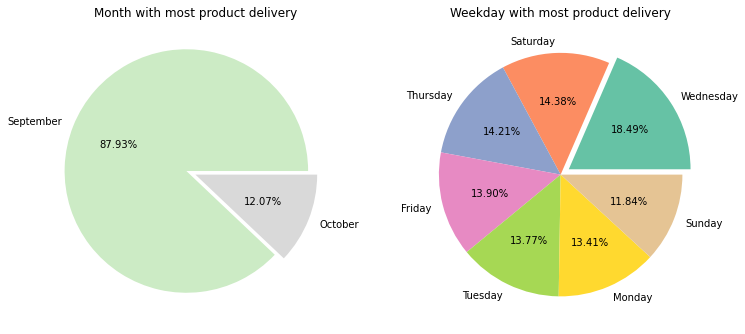

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

palette_color = sns.color_palette('Set3_r')
axs[0].pie(data=y, x=y['count'], colors=palette_color, labels=['September', 'October'], explode=(0.08,0), autopct='%0.2f%%')
axs[0].set_title("Month with most product delivery")

palette_color = sns.color_palette('Set2')
axs[1].pie(data=x, x=x['count'], colors=palette_color, labels=x['index'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
axs[1].set_title("Weekday with most product delivery")
plt.show()


- The given data for product delivery is over the period of two months, september and october
- Majority of the product delivery is done across the month of september
- Most number of products are delivered on wednesday, followed by saturday and then thursday
- Least number of produscts are delivered on sunday

## Multivariate Analysis

## which dest_city has most product deliverys in a state

In [52]:
x=merge_trip_data.groupby(['dest_state','dest_city'])['trip_uuid'].count().reset_index()
x[x['dest_state'].isin(dt_5)]

,dest_state,dest_city,trip_uuid
193,Haryana,Bahadurgarh,11
194,Haryana,Bhiwani,4
195,Haryana,ChrkhiDdri,3
196,Haryana,Dharuhera,2
197,Haryana,FBD,135
...,...,...,...
779,Uttar Pradesh,Tilhar,1
780,Uttar Pradesh,Tulsipur,1
781,Uttar Pradesh,Unnao,15
782,Uttar Pradesh,Varanasi,7


<AxesSubplot:xlabel='dest_state,dest_city'>

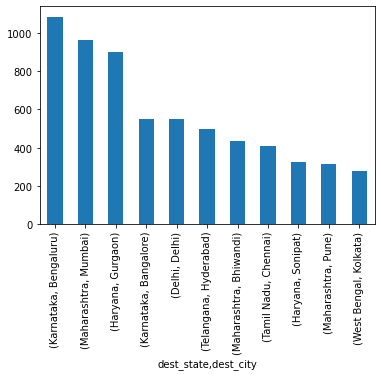

In [53]:
merge_trip_data.groupby(['dest_state','dest_city'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

City with most product deliverys in a state are -
- Bengakuru,Karnadaka
- Mumbai, Maharashtra
- Gurgaon, Hariyana

## Source_city with most deliverys in a state

<AxesSubplot:xlabel='source_state,source_city'>

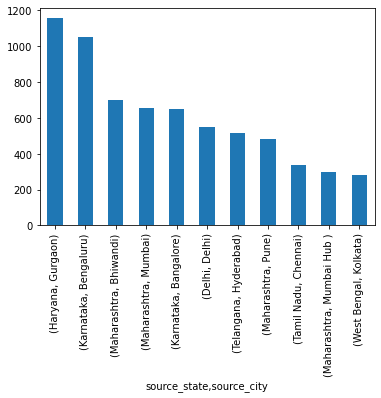

In [54]:
merge_trip_data.groupby(['source_state','source_city'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')

City with most product deliverys in a state are -
- Gurgaon
- Bangalore
- Bhiwandi

## which state has more source center

In [55]:
merge_trip_data

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_state,source_city,source_place,source_state,tot_mins_diff,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND209304AAA,2259.0,824.732854,1562.0,...,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,1260.604421,2018,9,12,Wednesday,September
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND561203AAB,180.0,73.186911,143.0,...,Karnataka,Doddablpur,ChikaDPP,Karnataka,58.832388,2018,9,12,Wednesday,September
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND000000ACB,3933.0,1932.273969,3347.0,...,Haryana,Gurgaon,Bilaspur,Haryana,834.638929,2018,9,12,Wednesday,September
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,100.0,17.175274,59.0,...,Maharashtra,Mumbai Hub,None,Maharashtra,100.494935,2018,9,12,Wednesday,September
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583119AAA,717.0,127.448500,341.0,...,Karnataka,Bellary,Dc,Karnataka,152.012914,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,IND160002AAC,257.0,57.762332,83.0,...,Punjab,Chandigarh,Mehmdpur,Punjab,152.787843,2018,10,3,Wednesday,October
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,IND121004AAA,60.0,15.513784,21.0,...,Haryana,FBD,Balabhgarh,Haryana,60.590521,2018,10,3,Wednesday,October
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,IND208006AAA,421.0,38.684839,282.0,...,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh,248.409092,2018,10,3,Wednesday,October
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,IND628204AAA,347.0,134.723836,264.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,105.656951,2018,10,3,Wednesday,October


<AxesSubplot:xlabel='source_state'>

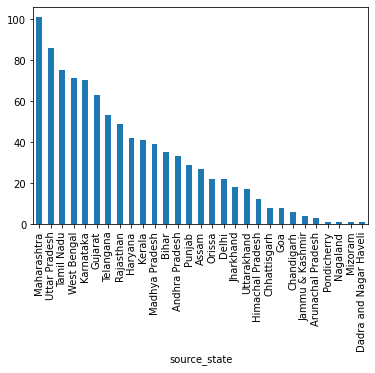

In [56]:
merge_trip_data.groupby('source_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar')

Top 3 Indian states with most delivery source centres are :
- Maharashtra
- Uttar Pradesh
- Tamil Nadu

## which state has more destination center

<AxesSubplot:xlabel='dest_state'>

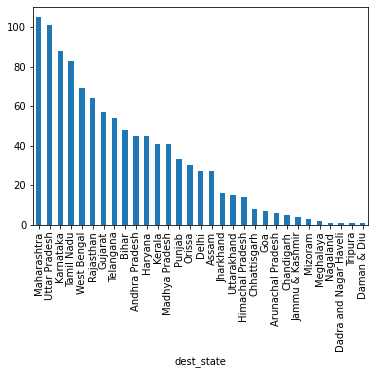

In [57]:
merge_trip_data.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False).plot(kind='bar')

Top 3 Indian states with most delivery destination centres are :

- Bengakuru,Karnadaka
- Mumbai, Maharashtra
- Gurgaon, Hariyana

## Top Indian states with most source and destination cities

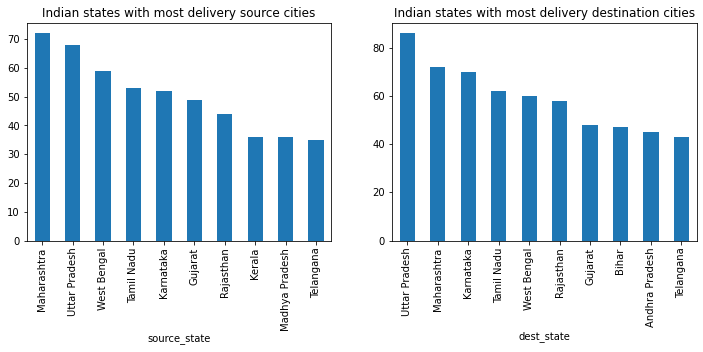

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(121)
merge_trip_data.groupby('source_state')['source_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery source cities')
plt.subplot(122)
merge_trip_data.groupby('dest_state')['dest_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery destination cities')
plt.show()


Top 5 Indian states with most delivery source cities are :
- Maharashtra
- Uttar Pradesh
- West Bengal
- Tamil Nadu
- Karnataka


Top 5 Indian states with most delivery destination cities are :
- Maharashtra
- Uttar Pradesh
- West Bengal
- Tamil Nadu and
- Karnataka


## Relation between actual time and estimated time for the completion of product delivery


In [59]:
x1=merge_trip_data.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

,source_state,variable,value
0,Andhra Pradesh,actual_time,398.435484
1,Arunachal Pradesh,actual_time,429.250000
2,Assam,actual_time,540.171642
3,Bihar,actual_time,492.645714
4,Chandigarh,actual_time,168.741935
5,Chhattisgarh,actual_time,174.139535
6,Dadra and Nagar Haveli,actual_time,48.333333
7,Delhi,actual_time,230.550824
8,Goa,actual_time,540.138462
9,Gujarat,actual_time,331.470667


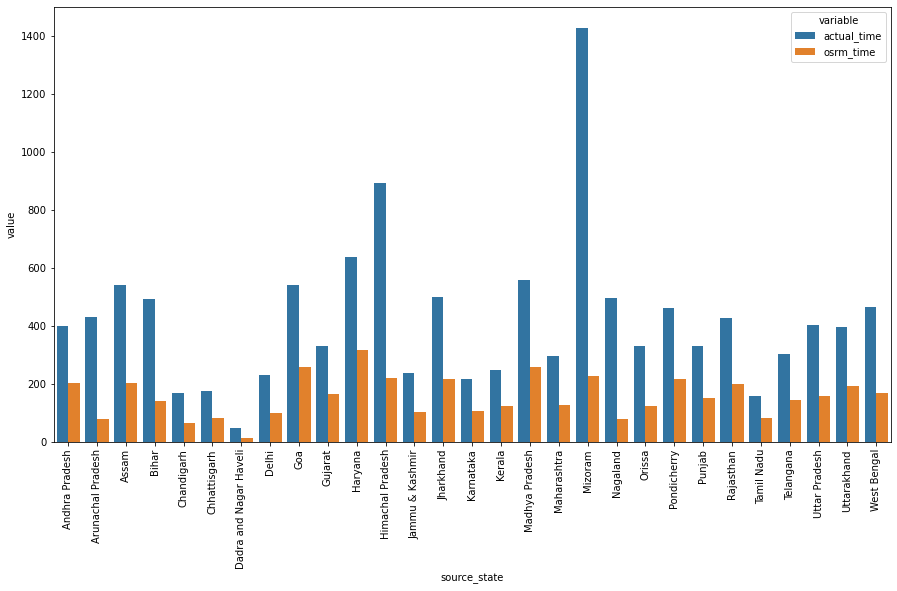

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()


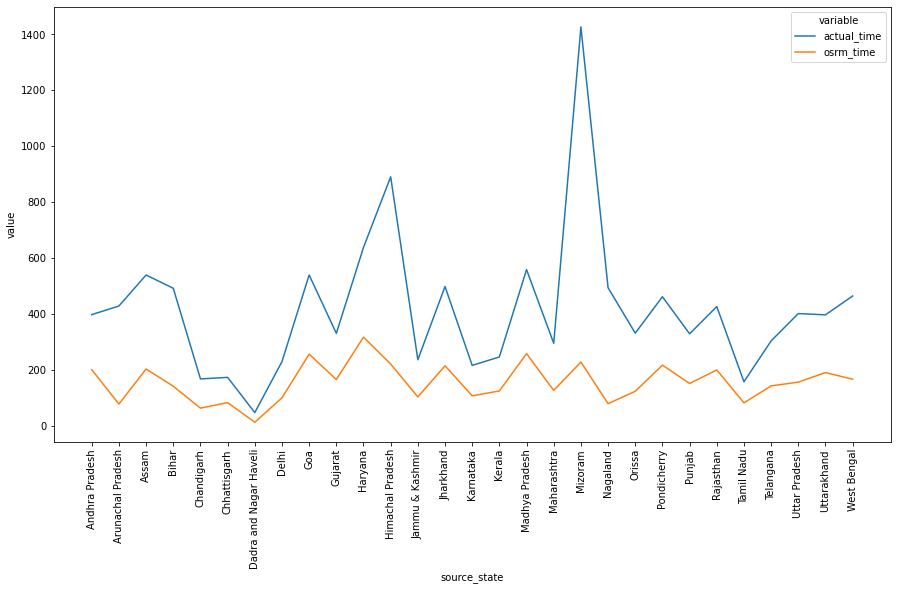

In [61]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

- Value for Actual time is always higher than that of the estimated time for product delivery
- Actual and estimated time difference for product delivery in places like Dadra & Nagar Haveli, Tamil Nadu and Karnataka are very low
- Actual and estimated time difference for product delivery in places like Mizoram, Himachal Paradesh and Goa are very high


## Relation between actual distance and estimated distance for product delivery


In [62]:
x1=merge_trip_data.groupby('source_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1

,source_state,variable,value
0,Andhra Pradesh,actual_distance_to_destination,205.461342
1,Arunachal Pradesh,actual_distance_to_destination,77.150532
2,Assam,actual_distance_to_destination,193.532247
3,Bihar,actual_distance_to_destination,153.588085
4,Chandigarh,actual_distance_to_destination,54.811432
5,Chhattisgarh,actual_distance_to_destination,73.734984
6,Dadra and Nagar Haveli,actual_distance_to_destination,14.349976
7,Delhi,actual_distance_to_destination,100.054953
8,Goa,actual_distance_to_destination,219.883526
9,Gujarat,actual_distance_to_destination,175.549300


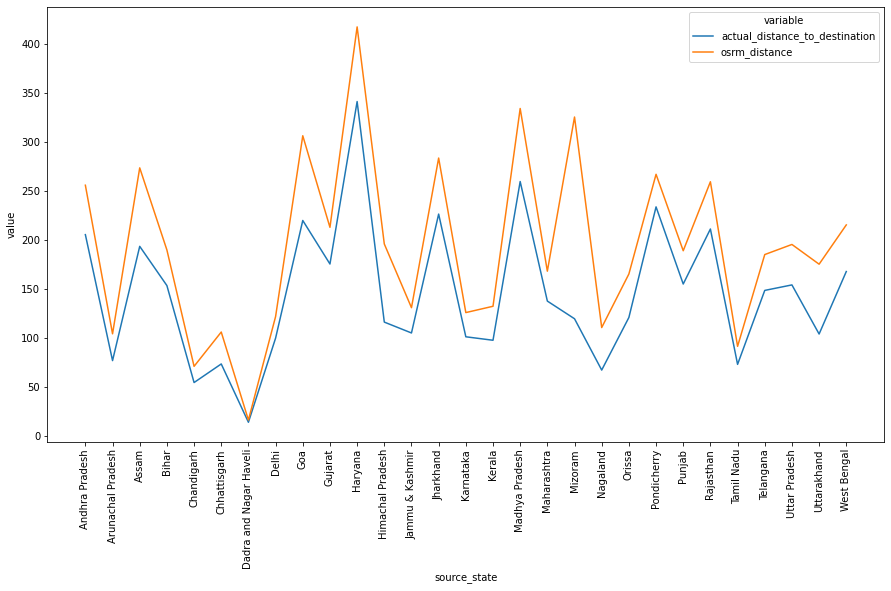

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

- Value for Actual distance is always higher than that of the estimated distance for product delivery
- Actual and estimated distance for product delivery differ the least in places like Dadra & Nagar Haveli and Tamil Nadu
- Actual and estimated distance for product delivery differ the most in places like Mizoram and Goa


## Relation between actual time and estimated time for product deliver from source to destination

In [64]:
x1=merge_trip_data.groupby('source_state').agg({'start_scan_to_end_scan':'mean','tot_mins_diff':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['start_scan_to_end_scan', 'tot_mins_diff'])
x1

,source_state,variable,value
0,Andhra Pradesh,start_scan_to_end_scan,610.087558
1,Arunachal Pradesh,start_scan_to_end_scan,508.500000
2,Assam,start_scan_to_end_scan,742.720149
3,Bihar,start_scan_to_end_scan,701.397143
4,Chandigarh,start_scan_to_end_scan,298.290323
5,Chhattisgarh,start_scan_to_end_scan,240.395349
6,Dadra and Nagar Haveli,start_scan_to_end_scan,71.200000
7,Delhi,start_scan_to_end_scan,363.497253
8,Goa,start_scan_to_end_scan,850.507692
9,Gujarat,start_scan_to_end_scan,485.690667


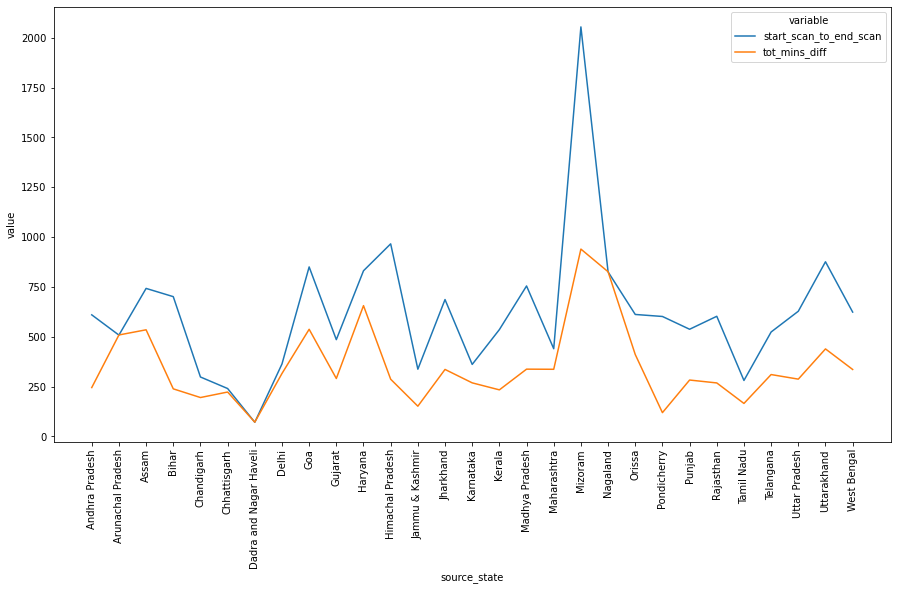

In [65]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

- Value for time taken to deliver from source to destination is higher than that of the total trip time most of the cases
- The values for both time taken for delivery and total trip time coincides for states like Arunachal Pradesh, Orissa and Dadra & Nagar Haveli
- Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh, Uttarakhand etc.


## Relation between actual time and estimated time for diffrent route types


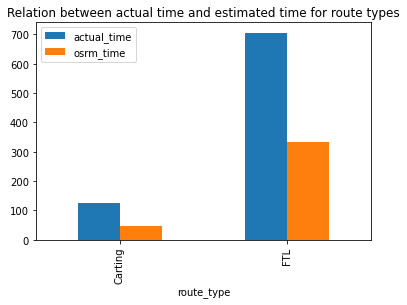

In [66]:
merge_trip_data.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.title('Relation between actual time and estimated time for route types')
plt.show()


- Full truck load route type takes more time to deliver products as its actual and estimated time is significantly higher than that of the carting route type
- Actual time is higher for both carting and FTL route types compared to estimated time


## Relation between actual distance and estimated distance for diffrent route types


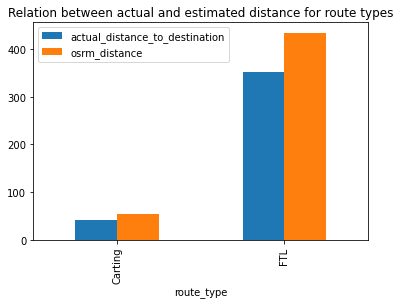

In [67]:
merge_trip_data.groupby('route_type').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).plot(kind='bar')
plt.title('Relation between actual and estimated distance for route types')
plt.show()


- Estimated distance is higher for both carting and FTL route types compared to actual distance
- Full truck load route type travels more distance to deliver products than that of the carting route type


# In-depth analysis and feature engineering

### 3.1 Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns,if required

In [68]:
data['total_mins_diff'] = (data.od_end_time - data.od_start_time) / pd.Timedelta(minutes=1)
data.drop(columns=['od_end_time','od_start_time'],axis=1,inplace=True)
data.head(30)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_mins_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,...,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,109.173183
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,...,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,109.173183
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,...,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,109.173183
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,...,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,109.173183
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,...,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333,109.173183


## 3.2 . Hypothesis testing between total time difference and start_scan_to_end_scan

- > start_scan_to_end_scan   ===== estimate time
- > tot_mins_diff            ===== orginal time
- > H0 =  mean of start_scan_to_end_scan & tot_mins_diff are equal
- > Hi = mean of start_scan_to_end_scan & tot_mins_diff are diffrent

## Permutation method

In [69]:
x=data.groupby(['trip_uuid','source_center']).agg({'total_mins_diff':'max','start_scan_to_end_scan':'max'})
x

total_mins_diff  start_scan_to_end_scan
trip_uuid               source_center                                         
trip-153671041653548748 IND209304AAA       1260.604421                  1260.0
                        IND462022AAA        999.505379                   999.0
trip-153671042288605164 IND561203AAB         58.832388                    58.0
                        IND572101AAA        122.779486                   122.0
trip-153671043369099517 IND000000ACB        834.638929                   834.0
...                                                ...                     ...
trip-153861115439069069 IND628204AAA         62.115193                    62.0
                        IND628613AAA         91.087797                    91.0
                        IND628801AAA         44.174403                    44.0
trip-153861118270144424 IND583119AAA        287.474007                   287.0
                        IND583201AAA         66.933565                    66.0

[26309 rows x 2 columns]

In [70]:
x=data.groupby(['trip_uuid','source_center']).agg({'total_mins_diff':'max','start_scan_to_end_scan':'max'})
x = x.groupby('trip_uuid').agg({'total_mins_diff':'sum','start_scan_to_end_scan':'sum'}).reset_index()
x.rename(columns={'total_mins_diff':'total_time_aggregated','start_scan_to_end_scan':'start_scan_to_end_scan_aggregated'},inplace=True)
x


,trip_uuid,total_time_aggregated,start_scan_to_end_scan_aggregated
0,trip-153671041653548748,2260.109800,2259.0
1,trip-153671042288605164,181.611874,180.0
2,trip-153671043369099517,3934.362520,3933.0
3,trip-153671046011330457,100.494935,100.0
4,trip-153671052974046625,718.349042,717.0
...,...,...,...
14812,trip-153861095625827784,258.028928,257.0
14813,trip-153861104386292051,60.590521,60.0
14814,trip-153861106442901555,422.119867,421.0
14815,trip-153861115439069069,348.512862,347.0


In [71]:
observed_mean_diff=np.mean(x['total_time_aggregated'])-np.mean(x['start_scan_to_end_scan_aggregated'])
observed_mean_diff

0.8858218717051614

In [72]:
P=np.concatenate((x['total_time_aggregated'],x['start_scan_to_end_scan_aggregated']))
P

array([2260.10980005,  181.61187375, 3934.36252007, ...,  421.        ,
        347.        ,  353.        ])

In [73]:
len(P)/2

14817.0

In [74]:
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)

In [75]:
test_sample

[5.8420498448965645,
 -3.8658503286877703,
 3.836186938698802,
 -0.4595330408247946,
 4.370085955218087,
 -1.1611791651909016,
 -9.2245851539044,
 4.0085114156981945,
 -9.584952489433363,
 3.9044300737260755,
 -2.801864398299358,
 -6.605261300917846,
 -3.7441607157139742,
 -1.5636613176800438,
 -4.81672234698874,
 3.464572911927803,
 -10.431163182900264,
 -6.22201856442382,
 1.4971670754516708,
 -2.7182528735573896,
 -11.751182713203207,
 -4.5234585403275105,
 3.284637990333067,
 -9.323413272504467,
 3.732815938644876,
 -7.672370301610954,
 1.3768850660840144,
 -8.734545764824134,
 1.4010328588467473,
 -11.63606657238995,
 10.682947640518819,
 4.129581722433613,
 -0.2499257413082887,
 8.283627767701546,
 -11.325144720460685,
 -13.47133413887866,
 -14.368250359978333,
 -2.109084837684236,
 2.1425192795774137,
 -11.16201598135035,
 -7.045195281170322,
 16.826418403315984,
 3.7818214884030112,
 -1.723734160565641,
 -2.4091695494072383,
 7.332625178416606,
 -8.802883788186932,
 7.609323069

<AxesSubplot:ylabel='Density'>

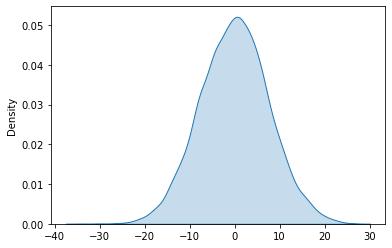

In [76]:
sns.kdeplot(test_sample,fill=True)

In [77]:
np.mean(test_sample)

-0.05560147860828252

In [78]:
np.std(test_sample)

7.661907558123829

significant_level=0.05
x1=(z*sigma)+mean   #eq

In [79]:
from scipy.stats import norm
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))

In [80]:
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

Lower critical value -15.072664345406222
Upper critical value 14.961461388189653
observed_mean_diff 0.8858218717051614


- Observed mean difference 0.88 is within the range of acceptance region, [ LCV, UCV ] = [ -14.69, 14.65 ]. So, Null hypothesis is accepted
### This concludes that the aggregated values for 'total trip time' and 'total time taken for product delivery' are approximately close together

## 3.3 Hypothesis testing between actual_time aggregated value and osrm time aggregated value



### Hypothesis
- > H0 : Mean of actual_time_aggregated and osrm_time_aggregated are same
- >H1 : Mean of actual_time_aggregated and osrm_time_aggregated are not the same


In [81]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','osrm_time':'max'})
print(x)
x=x.groupby('trip_uuid').agg({'actual_time':'sum','osrm_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_agg','osrm_time':'osrm_time_agg'},inplace=True)
x

                                       actual_time  osrm_time
trip_uuid               source_center                        
trip-153671041653548748 IND209304AAA         732.0      349.0
                        IND462022AAA         830.0      394.0
trip-153671042288605164 IND561203AAB          47.0       26.0
                        IND572101AAA          96.0       42.0
trip-153671043369099517 IND000000ACB         611.0      212.0
...                                            ...        ...
trip-153861115439069069 IND628204AAA          51.0       41.0
                        IND628613AAA          90.0       48.0
                        IND628801AAA          30.0       14.0
trip-153861118270144424 IND583119AAA         233.0       42.0
                        IND583201AAA          42.0       26.0

[26309 rows x 2 columns]


,trip_uuid,actual_time_agg,osrm_time_agg
0,trip-153671041653548748,1562.0,743.0
1,trip-153671042288605164,143.0,68.0
2,trip-153671043369099517,3347.0,1741.0
3,trip-153671046011330457,59.0,15.0
4,trip-153671052974046625,341.0,117.0
...,...,...,...
14812,trip-153861095625827784,83.0,62.0
14813,trip-153861104386292051,21.0,12.0
14814,trip-153861106442901555,282.0,54.0
14815,trip-153861115439069069,264.0,184.0


In [82]:
observed_mean_diff=np.mean(x['actual_time_agg'])-np.mean(x['osrm_time_agg'])
observed_mean_diff

194.9047040561517

In [83]:
P=np.concatenate((x['actual_time_agg'],x['osrm_time_agg']))
P

array([1562.,  143., 3347., ...,   54.,  184.,   68.])

In [84]:
len(P)/2

14817.0

In [85]:
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)

<AxesSubplot:ylabel='Density'>

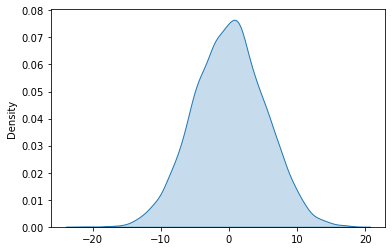

In [86]:
sns.kdeplot(test_sample,fill=True)

In [87]:
np.mean(test_sample)

0.04472686778700118

In [88]:
np.std(test_sample)

5.2375637556565025

significant_level=0.05
x1=(z*sigma)+mean   #eq

In [89]:
from scipy.stats import norm
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))

In [90]:
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

Lower critical value -10.22070946003209
Upper critical value 10.310163195606089
observed_mean_diff 194.9047040561517


- Observed mean difference 194.90 is not within the range of acceptance region, [ LCV, UCV ] = [ -10.18, 10.21 ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'actual time' and 'estimated time' for product delivery are not close together


## 3.4  Hypothesis testing between actual time aggregated value and segment actual time aggregated value


### Hypothesis
- > H0 : Mean of actual_time_aggregated and segment_actual_time_aggregated are same
- > H1 : Mean of actual_time_aggregated and segment_actual_time_aggregated are not the same


In [91]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','segment_actual_time':'sum'})
print(x)
x=x.groupby('trip_uuid').agg({'actual_time':'sum','segment_actual_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_agg','segment_actual_time':'segment_actual_time_agg'},inplace=True)
x

                                       actual_time  segment_actual_time
trip_uuid               source_center                                  
trip-153671041653548748 IND209304AAA         732.0                728.0
                        IND462022AAA         830.0                820.0
trip-153671042288605164 IND561203AAB          47.0                 46.0
                        IND572101AAA          96.0                 95.0
trip-153671043369099517 IND000000ACB         611.0                608.0
...                                            ...                  ...
trip-153861115439069069 IND628204AAA          51.0                 49.0
                        IND628613AAA          90.0                 89.0
                        IND628801AAA          30.0                 29.0
trip-153861118270144424 IND583119AAA         233.0                233.0
                        IND583201AAA          42.0                 41.0

[26309 rows x 2 columns]


,trip_uuid,actual_time_agg,segment_actual_time_agg
0,trip-153671041653548748,1562.0,1548.0
1,trip-153671042288605164,143.0,141.0
2,trip-153671043369099517,3347.0,3308.0
3,trip-153671046011330457,59.0,59.0
4,trip-153671052974046625,341.0,340.0
...,...,...,...
14812,trip-153861095625827784,83.0,82.0
14813,trip-153861104386292051,21.0,21.0
14814,trip-153861106442901555,282.0,281.0
14815,trip-153861115439069069,264.0,258.0


In [92]:
observed_mean_diff=np.mean(x['actual_time_agg'])-np.mean(x['segment_actual_time_agg'])
observed_mean_diff

2.922588918134579

In [93]:
P=np.concatenate((x['actual_time_agg'],x['segment_actual_time_agg']))
P


array([1562.,  143., 3347., ...,  281.,  258.,  274.])

In [94]:
len(P)/2


14817.0

In [95]:
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)


<AxesSubplot:ylabel='Density'>

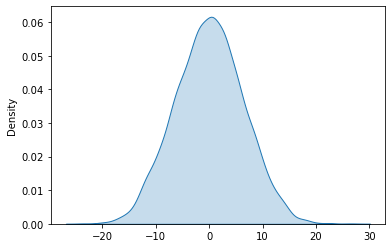

In [96]:
sns.kdeplot(test_sample,fill=True)


In [97]:
np.mean(test_sample)


-0.009099493824660994

In [98]:
np.std(test_sample)


6.424479835962477

In [99]:
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))


In [100]:
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

Lower critical value -12.600848591714913
Upper critical value 12.582649604065589
observed_mean_diff 2.922588918134579


- Observed mean difference 2.92 is within the range of acceptance region, [ LCV, UCV ] = [ -12.66, 12.73 ]. So, Null hypothesis is accepted
- This concludes that the aggregated values for 'actual time' and 'segmented actual time' for product delivery are approximately close together


## 3.5  Hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value


### Hypothesis
- > H0 : Mean of osrm_distance_aggregated and segment_osrm_distance_aggregated are same
- > H1 : Mean of osrm_distance_aggregated and segment_osrm_distance_aggregated are not the same


In [101]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'})
print(x)
x=x.groupby('trip_uuid').agg({'osrm_distance':'sum','segment_osrm_distance':'sum'}).reset_index()
x.rename(columns={'osrm_distance':'osrm_distance_agg','segment_osrm_distance':'segment_osrm_distance_agg'},inplace=True)
x

                                       osrm_distance  segment_osrm_distance
trip_uuid               source_center                                      
trip-153671041653548748 IND209304AAA        446.5496               670.6205
                        IND462022AAA        544.8027               649.8528
trip-153671042288605164 IND561203AAB         28.1994                28.1995
                        IND572101AAA         56.9116                55.9899
trip-153671043369099517 IND000000ACB        281.2109               317.7408
...                                              ...                    ...
trip-153861115439069069 IND628204AAA         42.5213                42.1431
                        IND628613AAA         40.6080                78.5869
                        IND628801AAA         16.0185                16.0184
trip-153861118270144424 IND583119AAA         52.5303                52.5303
                        IND583201AAA         28.0484                28.0484

[26309 rows

,trip_uuid,osrm_distance_agg,segment_osrm_distance_agg
0,trip-153671041653548748,991.3523,1320.4733
1,trip-153671042288605164,85.1110,84.1894
2,trip-153671043369099517,2372.0852,2545.2678
3,trip-153671046011330457,19.6800,19.8766
4,trip-153671052974046625,146.7918,146.7919
...,...,...,...
14812,trip-153861095625827784,73.4630,64.8551
14813,trip-153861104386292051,16.0882,16.0883
14814,trip-153861106442901555,63.2841,104.8866
14815,trip-153861115439069069,177.6635,223.5324


In [102]:
observed_mean_diff=np.mean(x['osrm_distance_agg'])-np.mean(x['segment_osrm_distance_agg'])
observed_mean_diff


-18.289453742322962

In [103]:
P=np.concatenate((x['osrm_distance_agg'],x['segment_osrm_distance_agg']))
P


array([ 991.3523,   85.111 , 2372.0852, ...,  104.8866,  223.5324,
         80.5787])

In [104]:
len(P)/2


14817.0

In [105]:
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)


<AxesSubplot:ylabel='Density'>

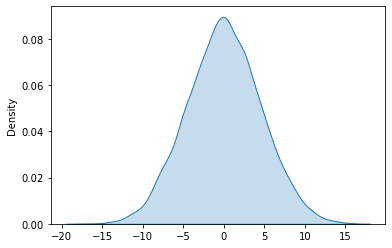

In [106]:
sns.kdeplot(test_sample,fill=True)


In [107]:
np.mean(test_sample)


-0.02092654088007009

In [108]:
np.std(test_sample)


4.584707173539173

In [109]:
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))


In [110]:
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

Lower critical value -9.006787480679279
Upper critical value 8.964934398919135
observed_mean_diff -18.289453742322962


- Observed mean difference -18.29 is not within the range of acceptance region, [ LCV, UCV ] = [ -8.99, 9.06 ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'estimate distance' and 'segmented estimate distance' for product delivery are not close together

## 3.6  Hypothesis testing between osrm time aggregated value and segment osrm time aggregated value


### Hypothesis
- > H0 : Mean of osmr_time_aggregated and segment_osrm_time_aggregated are same
- > H1 : Mean of osmr_time_aggregated and segment_osrm_time_aggregated are not the same

In [111]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_time':'max','segment_osrm_time':'sum'})
print(x)
x=x.groupby('trip_uuid').agg({'osrm_time':'sum','segment_osrm_time':'sum'}).reset_index()
x.rename(columns={'osrm_time':'osrm_time_agg','segment_osrm_time':'segment_osrm_time_agg'},inplace=True)
x

                                       osrm_time  segment_osrm_time
trip_uuid               source_center                              
trip-153671041653548748 IND209304AAA       349.0              534.0
                        IND462022AAA       394.0              474.0
trip-153671042288605164 IND561203AAB        26.0               26.0
                        IND572101AAA        42.0               39.0
trip-153671043369099517 IND000000ACB       212.0              231.0
...                                          ...                ...
trip-153861115439069069 IND628204AAA        41.0               42.0
                        IND628613AAA        48.0               77.0
                        IND628801AAA        14.0               14.0
trip-153861118270144424 IND583119AAA        42.0               42.0
                        IND583201AAA        26.0               25.0

[26309 rows x 2 columns]


,trip_uuid,osrm_time_agg,segment_osrm_time_agg
0,trip-153671041653548748,743.0,1008.0
1,trip-153671042288605164,68.0,65.0
2,trip-153671043369099517,1741.0,1941.0
3,trip-153671046011330457,15.0,16.0
4,trip-153671052974046625,117.0,115.0
...,...,...,...
14812,trip-153861095625827784,62.0,62.0
14813,trip-153861104386292051,12.0,11.0
14814,trip-153861106442901555,54.0,88.0
14815,trip-153861115439069069,184.0,221.0


In [112]:
observed_mean_diff=np.mean(x['osrm_time_agg'])-np.mean(x['segment_osrm_time_agg'])
observed_mean_diff


-19.03961665654316

In [113]:
P=np.concatenate((x['osrm_time_agg'],x['segment_osrm_time_agg']))
P


array([ 743.,   68., 1741., ...,   88.,  221.,   67.])

In [114]:
len(P)/2


14817.0

In [115]:
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)


<AxesSubplot:ylabel='Density'>

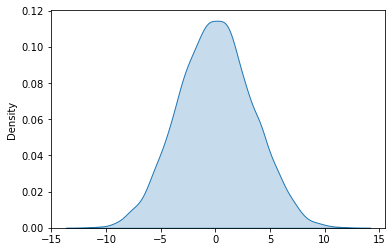

In [116]:
sns.kdeplot(test_sample,fill=True)


In [117]:
np.mean(test_sample)


0.014479057838968709

In [118]:
np.std(test_sample)


3.4033151725601254

In [119]:
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))


In [120]:
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

Lower critical value -6.655896108417598
Upper critical value 6.684854224095534
observed_mean_diff -19.03961665654316


- Observed mean difference -19.04 is not within the range of acceptance region, [ LCV, UCV ] = [ -6.68, 6.78 ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'estimate time' and 'segmented estimate time' for product delivery are not close together


## 3.7 Find outliers in the numerical variables and and check it using visual analysis


In [121]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_mins_diff
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368,961.759003
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530,1037.012613
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444,20.702813
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826,161.501292
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211,449.236567
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000,1634.950143
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000,7898.551955


- > we can see that features start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time', osrm_distance, segment_actual_time, segment_osrm_time and segment_osrm_distance have diffrent mean and median , so we need to find outlayer of these features

<AxesSubplot:>

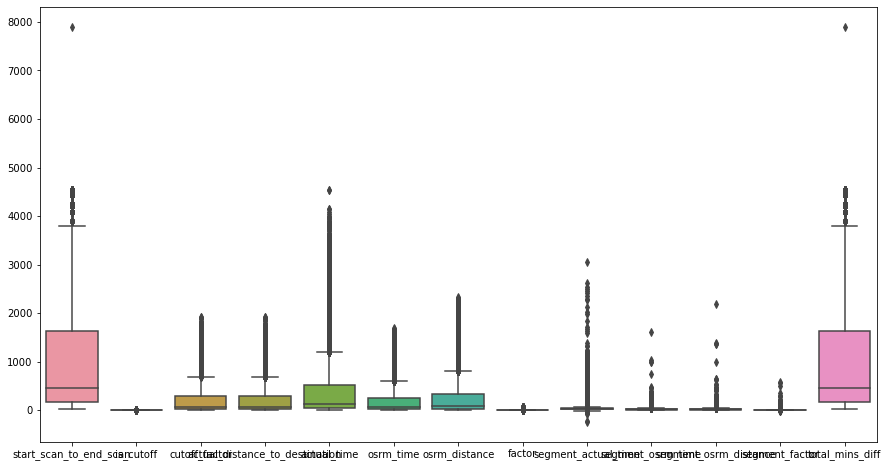

In [122]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

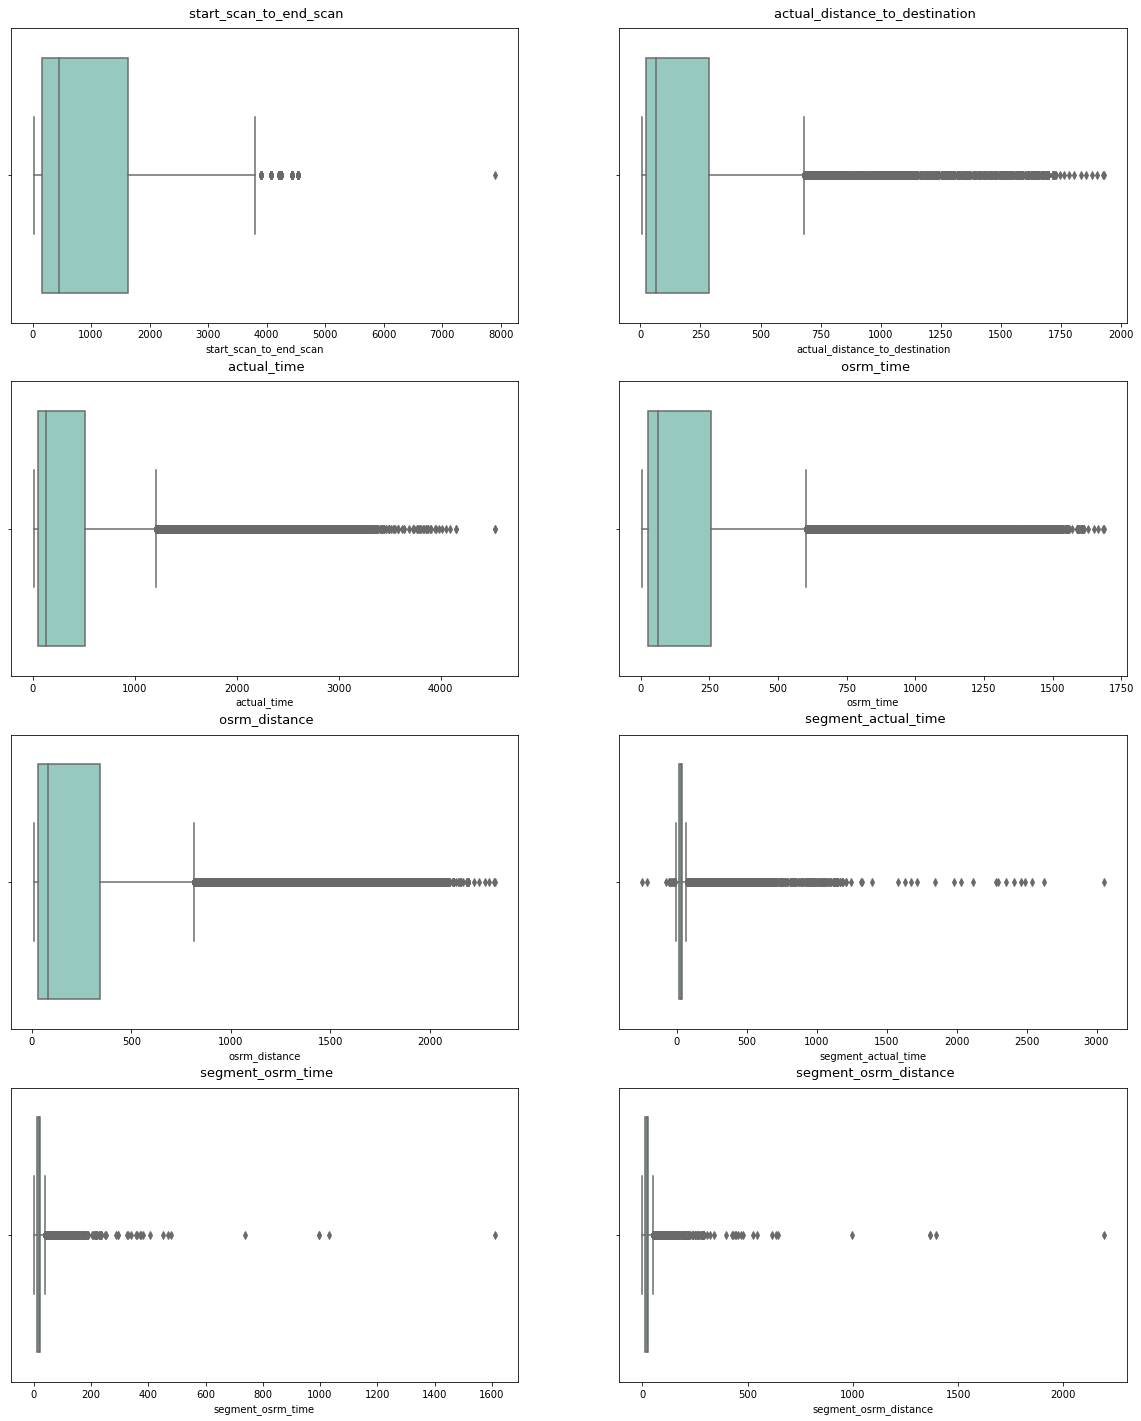

In [123]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=data, x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


In [124]:
da=data.copy()
#### Mean and median of attrs values shows large diffrance. So, we need to find outlayer values of purchace
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in attrs:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]
da

lower limit of start_scan_to_end_scan = -2048.5
upper limit of start_scan_to_end_scan = 3843.5
----------------------------------------------------------------
lower limit of actual_distance_to_destination = -371.6736259929169
upper limit of actual_distance_to_destination = 681.7383749520162
----------------------------------------------------------------
lower limit of actual_time = -642.0
upper limit of actual_time = 1206.0
----------------------------------------------------------------
lower limit of osrm_time = -318.0
upper limit of osrm_time = 602.0
----------------------------------------------------------------
lower limit of osrm_distance = -440.0031250000001
upper limit of osrm_distance = 813.1110750000001
----------------------------------------------------------------
lower limit of segment_actual_time = -10.0
upper limit of segment_actual_time = 70.0
----------------------------------------------------------------
lower limit of segment_osrm_time = -5.5
upper limit of segm

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_mins_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,37.406091,81.0,62.0,60.1136,1.306452,11.0,12.0,9.5478,0.916667,427.686364
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,427.686364


- Number of rows have reduced from 1,44,867 to 1,14,085 which proves that several rows containing outliers across different columns of the dataframe are removed successfully

## Categorical to Numerical encoding

### Do one-hot encoding of categorical variables (like route_type)

In [125]:
one_hot_encoded_data=pd.get_dummies(data,columns=['route_type'])
one_hot_encoded_data

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,is_cutoff,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_mins_diff,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,False,...,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,427.686364,1,0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,427.686364,1,0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,427.686364,1,0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,427.686364,1,0


- The route type column containing values 'carting' and 'FTL' are successfully one hot encoded from categorical values to binary numerical values 0 and 1

### Dropping unwanted columns before performing Target encoding

In [126]:
df_new=one_hot_encoded_data.drop(['data','trip_creation_time','source_name','destination_name',
                          'cutoff_timestamp','is_cutoff','cutoff_factor','segment_factor','factor'],axis=1)

In [127]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_mins_diff,route_type_Carting,route_type_FTL
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


In [128]:
!pip install category_encoders


## Encoding nominal categorical values to numerical values using target encoding


In [129]:
from category_encoders import TargetEncoder
cols=['route_schedule_uuid','trip_uuid','source_center','destination_center']
te = TargetEncoder()
for col in cols:
    df_new[col] = te.fit_transform(df_new[col], df_new['segment_actual_time'])
#p(urben|Loan_Status=Y)

In [130]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_mins_diff,route_type_Carting,route_type_FTL
0,15.016774,30.952799,14.878118,14.878118,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,15.016774,30.952799,14.878118,14.878118,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,15.016774,30.952799,14.878118,14.878118,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,15.016774,30.952799,14.878118,14.878118,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,15.016774,30.952799,14.878118,14.878118,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,26.440080,38.894273,31.677170,35.345313,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,26.440080,38.894273,31.677170,35.345313,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,26.440080,38.894273,31.677170,35.345313,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,26.440080,38.894273,31.677170,35.345313,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


- Successfully performed conversion of categorical values to corresponding numerical values with numbers derived from the target


## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df_new)
std_data = pd.DataFrame(std_data, columns=df_new.columns)
std_data

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_mins_diff,route_type_Carting,route_type_FTL
0,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.648246,-0.673677,-0.658642,-0.647814,-0.414331,-0.508094,-0.608251,-0.844299,1.484765,-1.484765
1,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.623604,-0.656958,-0.629422,-0.624640,-0.488998,-0.643449,-0.731779,-0.844299,1.484765,-1.484765
2,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.598385,-0.630207,-0.603449,-0.598958,-0.376997,-0.778805,-0.672644,-0.844299,1.484765,-1.484765
3,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.573802,-0.593424,-0.564489,-0.568034,-0.283663,-0.440416,-0.549064,-0.844299,1.484765,-1.484765
4,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.564329,-0.583392,-0.551502,-0.547479,-0.563666,-0.914160,-1.058963,-0.844299,1.484765,-1.484765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.547308,-0.539921,-0.499556,-0.514923,-0.451665,-0.440416,-0.819862,-0.515013,1.484765,-1.484765
144863,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.521701,-0.496450,-0.447610,-0.472762,-0.190329,0.168683,-0.305506,-0.515013,1.484765,-1.484765
144864,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.486711,-0.463011,-0.408650,-0.445666,-0.302330,1.048494,-0.118905,-0.515013,1.484765,-1.484765
144865,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.464921,-0.432916,-0.376183,-0.412000,-0.358330,0.574750,-0.220626,-0.515013,1.484765,-1.484765


# Recommendations and Insights
- It can be observed that there is heavy traffic in Mahrashtra followed by Karnataka and Haryana. This is a good indicator that we need to plan for resources on ground in these 3 states on priority. Especially, during festive
seasons
- There is a significant difference between OSRM (open source routing machine) and actual parameters. Revisit information fed to routing machine for trip planning.
- Most number of products were delivered through carting rather than full truck load and the total time taken for carting is significantly lower than that of FTL. This indicates that for faster delivery of the products, carting
method is more preferable
- From the data, we can observe both source and destination centres getting passively distributed more towards one of the cities from each direction / zones. However it would be difficult to conclude this, by looking at just
2 months data.
- Most of the products were delivered during wednesday followed by saturday and thursday. Least number of products were delivered on sunday. This might indicate that it is preferable for customers to get products
delivered during weekdays other than sundays or mondays
- The observed value for actual time is always higher than that of the estimated time for product delivery. However in certain states like Dadra & Nagar Haveli and Tamil Nadu, the difference between actual and estimated
time is low. Also, for product delivery in places like Mizoram and Himachal Pradesh, actual and estimated time difference are very high. If the routing machine is configured to give optimum results, then the difference can
explained pertaining to the traffic conditions or the closeness between starting and ending points of the delivery
- Similarly the observed value for actual distance is always higher than that of the estimated distance for product delivery. The degree of closeness/difference between the values can be explained by the possibility of
detours during product delivery or due to the inaccuracy in the estimation of shortest path
- The values for time taken to deliver from source to destination is higher than that of the total trip time most of the cases however the values coincides for states like Arunachal Pradesh, Orissa and Dadra & Nagar Haveli.
Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh and Uttarakhand
- The above three observations indicates that product delivery in Mizoram is most difficult, whereas it is much easier in the union terittory Dadra & Nagar Haveli
- Hypothesis test performed on different features indicated that observed values for estimated time and estimated distance vary significantly compared to actual time and actual distance. This indicate the chance for
discrepancies with transporters or error during the formation of optimum estimate values
